In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mean_01 = np.array([0.0, 0.0])
mean_02 = np.array([5.0, 5.0])

cov_01 = np.array([[1.0, 0.2],[0.2, 1.1]])
cov_02 = np.array([[1.0, 0.3],[0.3, 1.1]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape
print dist_02.shape

(500, 2)
(500, 2)


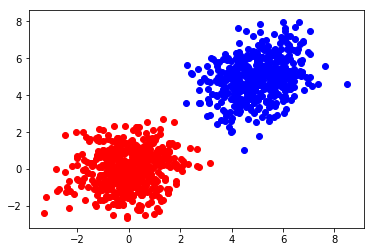

In [5]:
plt.scatter(dist_01[:, 0], dist_01[:, 1], c='r')
plt.scatter(dist_02[:, 0], dist_02[:, 1], c='b')

plt.show()

In [6]:
## Total Dataset
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
print data.shape

data[:dist_01.shape[0], :dist_01.shape[1]] = dist_01
data[dist_01.shape[0]: rows, :dist_01.shape[1]] = dist_02
data[dist_01.shape[0]: rows, -1] = 1.0

(1000, 3)


In [7]:
np.random.shuffle(data)

data[:10]

array([[-1.49487951,  0.34868395,  0.        ],
       [-1.12193765,  0.63936543,  0.        ],
       [ 5.66331792,  7.33382212,  1.        ],
       [ 6.81271761,  4.28549734,  1.        ],
       [ 6.02197575,  5.18840525,  1.        ],
       [ 0.79911019,  0.98506701,  0.        ],
       [ 0.19432448, -0.71973852,  0.        ],
       [ 4.9906953 ,  6.30726915,  1.        ],
       [ 5.02460098,  4.96397224,  1.        ],
       [ 5.94978851,  7.04095952,  1.        ]])

In [8]:
## Data Splitting
split = int(0.75*data.shape[0])
X_train = data[:split, :-1]
Y_train = data[:split, -1]

X_test = data[split:, :-1]
Y_test = data[split:, -1]

print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(750, 2)
(250, 2)
(750,)
(250,)


In [9]:
'''Functions'''
def sigmoid(z):
    sig = 1.0/(1+np.exp(-1*z))
    return sig

In [10]:
def hypothesis(x_sample,w,b):
    h = b + (x_sample*w).sum()
    return sigmoid(h)

In [16]:
def get_error(x, w, y_true, b):
    err = 0.0
    m = x.shape[0]
    for ix in range(m):
        add_term = -1*((y_true[ix]*(np.log(hypothesis(x[ix], w, b))))+((1-y_true[ix])*(np.log(1 - hypothesis(x[ix], w, b)))))
        err += add_term
    err = err/m
    return err

In [21]:
def get_gradients(x,w,y_true,b):
    grad_w = np.zeros(w.shape[0])
    grad_b = 0
    
    m = x.shape[0]
    for ix in range(m):
        grad_w += (hypothesis(x[ix], w, b) - y_true[ix])*(x[ix])
        grad_b += (hypothesis(x[ix], w, b) - y_true[ix])*(1)
    
    return [grad_w, grad_b]

In [22]:
def optimizer(x,w,y_true,b,learning_rate=0.001):
    error = get_error(x, w, y_true, b)
    
    [grad_w, grad_b] = get_gradients(x, w, y_true, b)
    
    b = b - learning_rate*grad_b
    w = w - learning_rate*grad_w
    
    return error, w, b

In [23]:
def Logistic_Regression(X_train, Y_train, nb_epochs=200, learning_rate=0.0001):
    
    loss = []
    
    ## Parameter Initialisation
    W = np.array([0.3, 0.2])
    b = 3.6
    
    for ix in range(nb_epochs):
        error, W, b = optimizer(X_train, W, Y_train, b, learning_rate)
        loss.append(error)
        
    W_final = W
    b_final = b
    
    return loss, W_final, b_final

In [24]:
loss_logs, W_final, b_final = Logistic_Regression(X_train, Y_train)

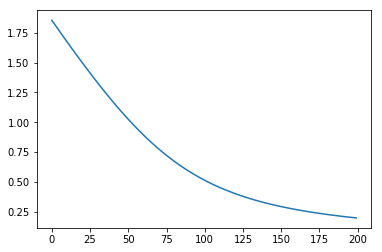

In [25]:
plt.plot(loss_logs)
plt.show()

In [49]:
class LogisticRegression:
    
    def sigmoid(z):
        sig = 1.0/(1+np.exp(-1*z))
        return sig
    
    def hypothesis(x_sample,w,b):
        h = b + (x_sample*w).sum()
        return sigmoid(h)
    
    def get_error(x, w, y_true, b):
        err = 0.0
        m = x.shape[0]
        for ix in range(m):
            add_term = -1*((y_true[ix]*(np.log(hypothesis(x[ix], w, b))))+((1-y_true[ix])*(np.log(1 - hypothesis(x[ix], w, b)))))
            err += add_term
        err = err/m
        return err
    
    def get_gradients(x,w,y_true,b):
        grad_w = np.zeros(w.shape[0])
        grad_b = 0    
        m = x.shape[0]
        for ix in range(m):
            grad_w += (hypothesis(x[ix], w, b) - y_true[ix])*(x[ix])
            grad_b += (hypothesis(x[ix], w, b) - y_true[ix])*(1)
        return [grad_w, grad_b]
    
    def optimizer(x,w,y_true,b,learning_rate=0.001):
        error = get_error(x, w, y_true, b)
        [grad_w, grad_b] = get_gradients(x, w, y_true, b)
        b = b - learning_rate*grad_b
        w = w - learning_rate*grad_w
        return error, w, b
    
    def Logistic_Regression(X_train, Y_train, nb_epochs=200, learning_rate=0.0001):
        loss = []
        ## Parameter Initialisation
        W = np.array([0.3, 0.2])
        b = 3.6
        for ix in range(nb_epochs):
            error, W, b = optimizer(X_train, W, Y_train, b, learning_rate)
            loss.append(error)     
        W_final = W
        b_final = b
        return loss, W_final, b_final
    
    fin_loss = []
    fin_w = np.array([0.3, 0.2])
    fin_b = 3.6
    
    
    
    def fit(self,x_train,y_train):
        self.fin_loss, self.fin_w, self.fin_b = Logistic_Regression(x_train, y_train)
        plt.plot(self.fin_loss)
        plt.show()
        
    def predict(self, x_test):
        y_pred = []
        m = x_test.shape[0]
        for ix in range(m):
            cur_ans = hypothesis(x_test[ix],self.fin_w,self.fin_b)
            y_pred.append(cur_ans)
        return np.array(y_pred)
    
    def score(self,x_test,y_test):
        m = x_test.shape[0]
        ctr = 0.0
        for ix in range(m):
            ans_pred = hypothesis(x_test[ix],self.fin_w,self.fin_b)
            if ans_pred>=0.5:
                fin_ans = 1.0
            else:
                fin_ans = 0.0
            if fin_ans==y_test[ix]:
                ctr += 1
        return ctr/m

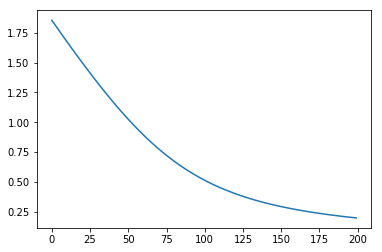

In [50]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

In [51]:
y_pred = lr.predict(X_test)
y_pred = np.array(y_pred)
print y_pred.shape

(250,)


In [53]:
print lr.score(X_test,Y_test)

0.948
